Eleonora Pura, 17-732-678

In [4]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import statistics
import glob
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
from NEMtropy import matrix_generator
import warnings
warnings.filterwarnings('ignore')

<h1>A07.1 - The Marčenko-Pastur law</h1>

Task: For the 97 most capitalized stocks in the NY Stock Exchange, filter the correlation matrix of returns at the 1 hour and 1 minute timescales using Marčenko-Pastur law

For each of the provided correlation matrices (for 1 hour and 1
minute returns):
+ compute the eigenvalues and eigenvectors
+ plot the histogram of eigenvalues and superimpose the Marčenko-Pastur law with parameter
    
    - for hourly returns, 𝑄 = 3.6289
    - for minute returns, 𝑄 = 200.8969
    
+ compute the denoised correlations (see lecture)


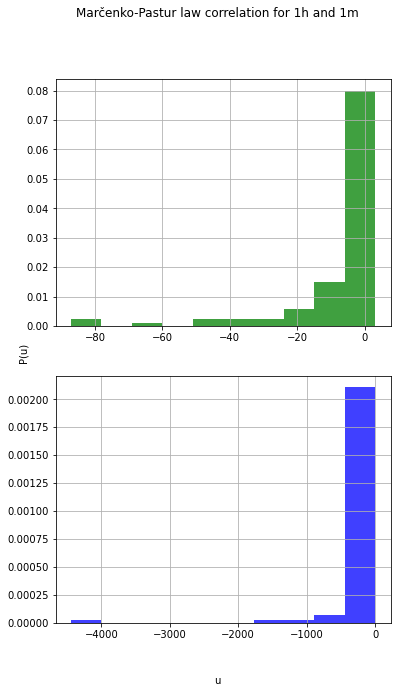

In [79]:
Q_1h = 3.6289
cormat_1h = np.load('Data/cormat_1h.npy')

Q_1m = 200.8969
cormat_1m = np.load('Data/cormat_1m.npy')

eigval_1h, eigvec_1h = np.linalg.eig(cormat_1h)
eigval_1m, eigvec_1m = np.linalg.eig(cormat_1m)

# 1 hour
lambda_max_1h = 1 + (1/Q_1h) + 2* math.sqrt(1/Q_1h)
lambda_min_1h = 1 + (1/Q_1h) - 2* math.sqrt(1/Q_1h)

distribution_eigval_1h = []
for x in eigval_1h:
    distribution_eigval_1h.append((Q_1h/2*math.pi) * (((lambda_max_1h - x)*(x - lambda_min_1h))**1/2)/x)

fig, axs = plt.subplots(2, figsize=(6, 10))
fig.suptitle('Marčenko-Pastur law correlation for 1h and 1m')
fig.text(0.5, 0.04, 'u', ha='center')
fig.text(0.04, 0.5, 'P(u)', va='center', rotation='vertical')
    
n, bins, patches = axs[0].hist(distribution_eigval_1h, eigval_1h.sort(), density=True, facecolor='g', alpha=0.75)
axs[0].grid(True)  

# 1 minute    
lambda_max_1m = 1 + (1/Q_1m) + 2* math.sqrt(1/Q_1m)
lambda_min_1m = 1 + (1/Q_1m) - 2* math.sqrt(1/Q_1m)

distribution_eigval_1m = []
for x in eigval_1m:
    distribution_eigval_1m.append((Q_1m/2*math.pi) * (((lambda_max_1m - x)*(x - lambda_min_1m))**1/2)/x)
    
n, bins, patches = axs[1].hist(distribution_eigval_1m, eigval_1m.sort(), density=True, facecolor='b', alpha=0.75)

axs[1].grid(True)

# Denoised correlation ??

<h1>A07.2 - Correlation MSTs</h1>

Task: Build MSTs from denoised correlations and analyze them

+ make a scatterplot of the 1 hour vs 1 minute denoised correlations (1 data point per pair of stocks)
+ from the denoised correlation matrices, build the Minimum Spanning Tree (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, …) as an attribute to the nodes and calculate the degrees
+ make a scatterplot of the 1 hour vs 1 minute MST degrees of stocks (1 data point per stock)


<h1>A07.3 - Conclusions</h1>

Task: finish the analysis by drawing conclusions<

Answer the following questions (for both timescales):
1. Is there a ‘market mode’?
2. Which is the stock that has the strongest relation with the market?
3. Which are the 5 stocks with highest degree on the MST?
4. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?
